In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
# データ読み込み Yは最初の列に配置する
dataframe = pandas.read_csv('./tokyo-weather-2003-2012.csv', usecols=[0,3,4,5,6], engine='python', skip_footer=1)
dataframe.head()

/usr/local/Cellar/python3/3.6.4/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: The 'skip_footer' argument has been deprecated and will be removed in a future version. Please use the 'skipfooter' argument instead.
  


,ice_sales,avg_temp,total_rain,humidity,num_day_over25deg
0,331,9.3,101.0,46,0
1,268,9.9,53.5,52,0
2,365,12.7,159.5,49,0
3,492,19.2,121.0,61,3
4,632,22.4,172.5,65,7


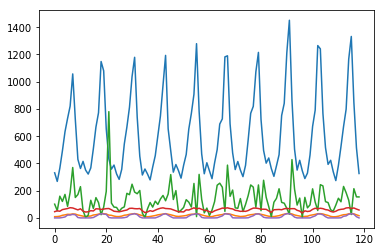

In [4]:
plt.plot(dataframe)
plt.show()

In [5]:
#set dataset
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)

(119, 5)


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)
print(dataset[0,:])

[ 0.05325446  0.03968254  0.12556343  0.2564103   0.        ]


In [15]:
#split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(dataset))
print(train.shape)
print(test.shape)

119
(79, 5)
(40, 5)


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        xset = []
        for j in range(dataset.shape[1]):
            a = dataset[i:(i+look_back), j]
            xset.append(a)
        dataY.append(dataset[i + look_back, 0])      
        dataX.append(xset)
    return numpy.array(dataX), numpy.array(dataY)

In [19]:
# reshape into X=t and Y=t+1
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape)
print(trainY.shape)
print(trainX[0])
print(trainY[0])

(66, 5, 12)
(66,)
[[ 0.05325446  0.          0.08199492  0.18934911  0.30769232  0.39053252
   0.4674556   0.66694844  0.3854607   0.13693997  0.08030432  0.12426037]
 [ 0.03968254  0.06349203  0.17460316  0.4325397   0.55952376  0.72619039
   0.70238084  0.84126979  0.78571421  0.51984119  0.36111104  0.19444442]
 [ 0.12556343  0.0643915   0.20090149  0.15132003  0.21764328  0.10495815
   0.23696072  0.47198972  0.1886671   0.21635544  0.2910496   0.06374758]
 [ 0.2564103   0.41025645  0.33333331  0.6410256   0.74358982  0.84615391
   1.          0.94871801  0.76923078  0.58974355  0.79487187  0.3589744 ]
 [ 0.          0.          0.          0.09677419  0.22580644  0.6774193
   0.6774193   0.83870965  0.74193549  0.09677419  0.          0.        ]]
0.0701606


In [20]:
# reshape input to be [samples, time steps(number of variables), features] *convert time series into column
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))
print(trainX.shape)

(66, 5, 12)


In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(testX.shape[1], look_back)))	#shape：変数数、遡る時間数
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
 - 1s - loss: 0.0650
Epoch 2/1000
 - 0s - loss: 0.0335
Epoch 3/1000
 - 0s - loss: 0.0212
Epoch 4/1000
 - 0s - loss: 0.0155
Epoch 5/1000
 - 0s - loss: 0.0134
Epoch 6/1000
 - 0s - loss: 0.0121
Epoch 7/1000
 - 1s - loss: 0.0103
Epoch 8/1000
 - 0s - loss: 0.0093
Epoch 9/1000
 - 0s - loss: 0.0084
Epoch 10/1000
 - 0s - loss: 0.0081
Epoch 11/1000
 - 0s - loss: 0.0074
Epoch 12/1000
 - 0s - loss: 0.0073
Epoch 13/1000
 - 0s - loss: 0.0065
Epoch 14/1000
 - 0s - loss: 0.0056
Epoch 15/1000
 - 0s - loss: 0.0049
Epoch 16/1000
 - 0s - loss: 0.0047
Epoch 17/1000
 - 0s - loss: 0.0038
Epoch 18/1000
 - 0s - loss: 0.0042
Epoch 19/1000
 - 0s - loss: 0.0034
Epoch 20/1000
 - 0s - loss: 0.0034
Epoch 21/1000
 - 0s - loss: 0.0031
Epoch 22/1000
 - 0s - loss: 0.0030
Epoch 23/1000
 - 0s - loss: 0.0030
Epoch 24/1000
 - 0s - loss: 0.0027
Epoch 25/1000
 - 0s - loss: 0.0026
Epoch 26/1000
 - 0s - loss: 0.0030
Epoch 27/1000
 - 0s - loss: 0.0024
Epoch 28/1000
 - 0s - loss: 0.0027
Epoch 29/1000
 - 0s - loss: 0

 - 0s - loss: 5.5269e-04
Epoch 221/1000
 - 0s - loss: 5.8423e-04
Epoch 222/1000
 - 0s - loss: 5.2548e-04
Epoch 223/1000
 - 0s - loss: 5.6553e-04
Epoch 224/1000
 - 0s - loss: 5.2498e-04
Epoch 225/1000
 - 0s - loss: 6.7586e-04
Epoch 226/1000
 - 0s - loss: 5.3698e-04
Epoch 227/1000
 - 0s - loss: 5.2249e-04
Epoch 228/1000
 - 0s - loss: 6.5644e-04
Epoch 229/1000
 - 0s - loss: 5.5666e-04
Epoch 230/1000
 - 0s - loss: 5.5870e-04
Epoch 231/1000
 - 0s - loss: 5.8572e-04
Epoch 232/1000
 - 0s - loss: 6.1188e-04
Epoch 233/1000
 - 0s - loss: 7.4863e-04
Epoch 234/1000
 - 0s - loss: 7.8524e-04
Epoch 235/1000
 - 0s - loss: 5.6904e-04
Epoch 236/1000
 - 0s - loss: 5.8700e-04
Epoch 237/1000
 - 0s - loss: 5.6486e-04
Epoch 238/1000
 - 0s - loss: 6.9118e-04
Epoch 239/1000
 - 0s - loss: 5.7688e-04
Epoch 240/1000
 - 0s - loss: 6.6166e-04
Epoch 241/1000
 - 0s - loss: 6.3859e-04
Epoch 242/1000
 - 0s - loss: 5.6365e-04
Epoch 243/1000
 - 0s - loss: 4.7963e-04
Epoch 244/1000
 - 0s - loss: 5.2929e-04
Epoch 245/1000


 - 0s - loss: 2.4832e-04
Epoch 426/1000
 - 0s - loss: 2.5565e-04
Epoch 427/1000
 - 0s - loss: 2.4614e-04
Epoch 428/1000
 - 0s - loss: 3.4660e-04
Epoch 429/1000
 - 0s - loss: 2.5363e-04
Epoch 430/1000
 - 0s - loss: 2.2183e-04
Epoch 431/1000
 - 0s - loss: 4.5724e-04
Epoch 432/1000
 - 0s - loss: 3.1029e-04
Epoch 433/1000
 - 0s - loss: 4.3540e-04
Epoch 434/1000
 - 0s - loss: 5.9902e-04
Epoch 435/1000
 - 0s - loss: 2.6137e-04
Epoch 436/1000
 - 0s - loss: 2.1826e-04
Epoch 437/1000
 - 0s - loss: 2.1520e-04
Epoch 438/1000
 - 0s - loss: 2.2824e-04
Epoch 439/1000
 - 0s - loss: 2.8520e-04
Epoch 440/1000
 - 0s - loss: 2.3354e-04
Epoch 441/1000
 - 1s - loss: 2.5352e-04
Epoch 442/1000
 - 0s - loss: 2.2191e-04
Epoch 443/1000
 - 0s - loss: 2.4609e-04
Epoch 444/1000
 - 0s - loss: 2.7216e-04
Epoch 445/1000
 - 0s - loss: 1.9389e-04
Epoch 446/1000
 - 0s - loss: 2.9511e-04
Epoch 447/1000
 - 0s - loss: 2.5799e-04
Epoch 448/1000
 - 0s - loss: 2.3284e-04
Epoch 449/1000
 - 0s - loss: 4.0443e-04
Epoch 450/1000


 - 0s - loss: 1.3563e-04
Epoch 631/1000
 - 0s - loss: 9.1863e-05
Epoch 632/1000
 - 0s - loss: 1.0544e-04
Epoch 633/1000
 - 0s - loss: 1.1111e-04
Epoch 634/1000
 - 0s - loss: 8.3802e-05
Epoch 635/1000
 - 0s - loss: 1.3249e-04
Epoch 636/1000
 - 0s - loss: 1.4655e-04
Epoch 637/1000
 - 0s - loss: 9.6021e-05
Epoch 638/1000
 - 0s - loss: 1.2356e-04
Epoch 639/1000
 - 0s - loss: 1.2940e-04
Epoch 640/1000
 - 0s - loss: 8.9662e-05
Epoch 641/1000
 - 0s - loss: 1.1774e-04
Epoch 642/1000
 - 0s - loss: 9.1114e-05
Epoch 643/1000
 - 0s - loss: 8.5522e-05
Epoch 644/1000
 - 0s - loss: 9.4018e-05
Epoch 645/1000
 - 0s - loss: 1.5502e-04
Epoch 646/1000
 - 0s - loss: 9.2410e-05
Epoch 647/1000
 - 0s - loss: 1.4255e-04
Epoch 648/1000
 - 0s - loss: 1.5686e-04
Epoch 649/1000
 - 0s - loss: 1.2551e-04
Epoch 650/1000
 - 0s - loss: 2.1890e-04
Epoch 651/1000
 - 0s - loss: 1.2267e-04
Epoch 652/1000
 - 0s - loss: 1.1656e-04
Epoch 653/1000
 - 0s - loss: 1.3708e-04
Epoch 654/1000
 - 0s - loss: 1.0962e-04
Epoch 655/1000


 - 0s - loss: 4.7797e-05
Epoch 836/1000
 - 0s - loss: 4.2659e-05
Epoch 837/1000
 - 0s - loss: 5.4223e-05
Epoch 838/1000
 - 0s - loss: 5.5018e-05
Epoch 839/1000
 - 0s - loss: 4.3003e-05
Epoch 840/1000
 - 0s - loss: 7.8632e-05
Epoch 841/1000
 - 0s - loss: 6.6681e-05
Epoch 842/1000
 - 0s - loss: 6.7369e-05
Epoch 843/1000
 - 0s - loss: 4.0186e-05
Epoch 844/1000
 - 0s - loss: 5.0811e-05
Epoch 845/1000
 - 0s - loss: 7.0072e-05
Epoch 846/1000
 - 0s - loss: 5.9999e-05
Epoch 847/1000
 - 0s - loss: 1.3177e-04
Epoch 848/1000
 - 0s - loss: 1.0251e-04
Epoch 849/1000
 - 0s - loss: 7.8657e-05
Epoch 850/1000
 - 0s - loss: 6.0743e-05
Epoch 851/1000
 - 0s - loss: 7.9388e-05
Epoch 852/1000
 - 0s - loss: 1.0034e-04
Epoch 853/1000
 - 0s - loss: 5.1490e-05
Epoch 854/1000
 - 0s - loss: 1.1692e-04
Epoch 855/1000
 - 0s - loss: 9.5256e-05
Epoch 856/1000
 - 0s - loss: 5.5112e-05
Epoch 857/1000
 - 0s - loss: 6.2939e-05
Epoch 858/1000
 - 0s - loss: 1.1735e-04
Epoch 859/1000
 - 0s - loss: 1.0651e-04
Epoch 860/1000
